In [70]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.neighbors import KDTree
from sklearn.cluster import KMeans
from collections import Counter
from scipy.spatial.distance import cdist
import pulp

In [2]:
% matplotlib inline

# Image Clustering

In [89]:
img_one = mpimg.imread('dog.jpg')
img_two = mpimg.imread('dog_two.jpg')
img_three = mpimg.imread('./cat.jpg')

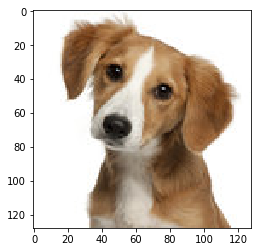

In [90]:
plt.imshow(img_one)

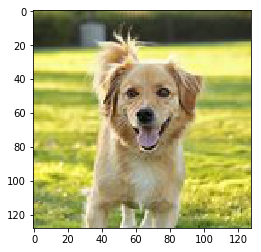

In [92]:
plt.imshow(img_two)

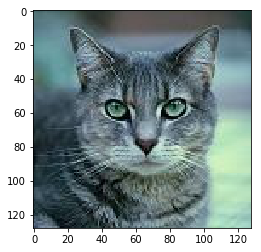

In [94]:
plt.imshow(img_three)

In [95]:
print img_one.shape
print img_two.shape
print img_three.shape

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


## convert the image into grayscale

In [96]:
gray_one = cv2.cvtColor(img_one, cv2.COLOR_BGR2GRAY)
gray_two = cv2.cvtColor(img_two, cv2.COLOR_BGR2GRAY)
gray_three = cv2.cvtColor(img_three, cv2.COLOR_BGR2GRAY)

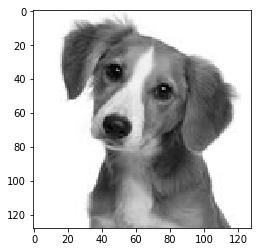

In [97]:
plt.imshow(gray_one, cmap='gray')

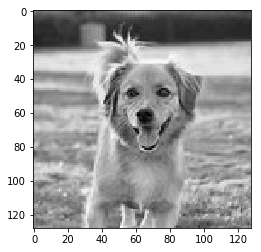

In [98]:
plt.imshow(gray_two, cmap='gray')

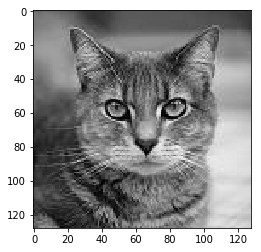

In [99]:
plt.imshow(gray_three, cmap='gray')

## KMeans for images

In [39]:
n = 5
kmeans_one = KMeans(n_clusters= n, random_state=1).fit(gray_one.flatten().reshape(-1,1))

In [40]:
labels_one = kmeans_one.labels_.reshape(128,128)

In [41]:
clustered_one = np.copy(gray_one)
for i in range(n):
    clustered_one[labels_one == i] = kmeans_one.cluster_centers_[i]

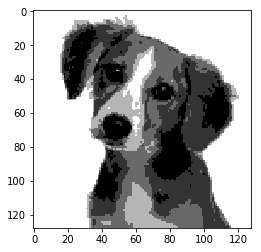

In [42]:
plt.imshow(clustered_one, cmap='gray')

In [43]:
n = 5
kmeans_two = KMeans(n_clusters= n, random_state=1).fit(gray_two.flatten().reshape(-1,1))

In [44]:
labels_two = kmeans_two.labels_.reshape(128,128)

In [45]:
clustered_two = np.copy(gray_two)
for i in range(n):
    clustered_two[labels_two == i] = kmeans_two.cluster_centers_[i]

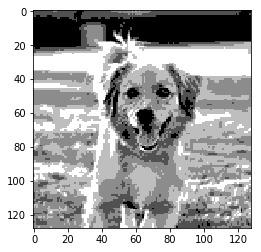

In [46]:
plt.imshow(clustered_two, cmap='gray')

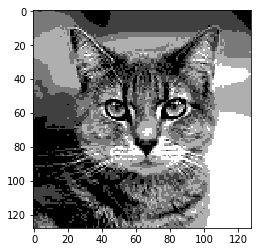

In [100]:
n = 5
kmeans_three = KMeans(n_clusters= n, random_state=1).fit(gray_three.flatten().reshape(-1,1))
labels_three = kmeans_three.labels_.reshape(128,128)
clustered_three = np.copy(gray_three)
for i in range(n):
    clustered_three[labels_three == i] = kmeans_three.cluster_centers_[i]
plt.imshow(clustered_three, cmap='gray')

In [56]:
masses_one = []
weights_one = []
for i in range(n):
    masses_one.append(kmeans_one.cluster_centers_[i][0])
    weights_one.append(sum((labels_one == i).flatten()))

In [57]:
masses_two = []
weights_two = []
for i in range(n):
    masses_two.append(kmeans_two.cluster_centers_[i][0])
    weights_two.append(sum((labels_two == i).flatten()))

In [101]:
masses_three = []
weights_three = []
for i in range(n):
    masses_three.append(kmeans_three.cluster_centers_[i][0])
    weights_three.append(sum((labels_three == i).flatten()))

In [62]:
def gen_signature(masses, weights):
    sig = []
    for i in range(len(masses)):
        sig.append((masses[i], weights[i]))
    return np.array(sig)

In [102]:
sig_one = gen_signature(masses_one, weights_one)
sig_two = gen_signature(masses_two, weights_two)
sig_three = gen_signature(masses_three, weights_three)

In [103]:
sig_one

array([[  137.40453767,  2336.        ],
       [  253.45892763,  7572.        ],
       [   55.0050226 ,  1991.        ],
       [  195.31422018,  1308.        ],
       [   95.78753541,  3177.        ]])

In [104]:
sig_two

array([[  168.95588894,  4466.        ],
       [  101.48817492,  2241.        ],
       [   51.30409091,  2200.        ],
       [  137.68311357,  4702.        ],
       [  208.67279279,  2775.        ]])

In [105]:
sig_three

array([[  202.72572178,  2286.        ],
       [   43.34793447,  2808.        ],
       [  119.21440217,  3680.        ],
       [  152.18015134,  3436.        ],
       [   83.24460949,  4174.        ]])

# Distance Calculation/Transportation Problem

In [83]:
cost = cdist(sig_one[:,0].reshape(n,1), sig_two[:,0].reshape(n,1))

In [84]:
from scipy.optimize import linear_sum_assignment

In [88]:
row_ind, col_ind = linear_sum_assignment(cost)
cost[row_ind, col_ind].sum()

80.824613181372513

In [106]:
cost = cdist(sig_one[:,0].reshape(n,1), sig_three[:,0].reshape(n,1))
row_ind, col_ind = linear_sum_assignment(cost)
cost[row_ind, col_ind].sum()

136.25742423760244

In [107]:
cost = cdist(sig_two[:,0].reshape(n,1), sig_three[:,0].reshape(n,1))
row_ind, col_ind = linear_sum_assignment(cost)
cost[row_ind, col_ind].sum()

67.391241873442524